In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load data
data = pd.read_csv("data/data.csv")

### Pré-processamento dos dados

Tendo em conta as conclusões obtidas pela a análise dos dados originais mostrada anteriormente, podemos apercebermo-nos que é necessário realizar um pré-processamento dos dados, com o objetivo de resolver o maior problema adjacente a estes: a falta de balanceamento entre as diferentes classes de alvo. 

Para tal podemos usar entre outras estratégias uma das seguintes:
- **oversampling** : «Aumentar o número de amostras/entradas da menor classe até coincidir com o tamanho da maior classe»
- **undersampling** : «Diminuir o número de amostras/entradas da maior classe até coincidir com o tamanho da menor classe»

Em qualquer uma das abordagens acima, a escolha das amostras escolhidas para serem retidas ou replicadas com pequenas modificações é aleatória.

#### Undersampling

Segue o seguinte esquema: [incluir imagem significativa]

Onde sáo selecionados apenas algumas amostras da classe maior de forma random, até totalizarem o numero de amostras da classe menor

-- incluir codigo

#### Oversampling

Segue o seguinte esquema: [incluir imagem significativa]

As entradas da classe menor sáo replicadas até totalizarem o número de amostras da classe maior.

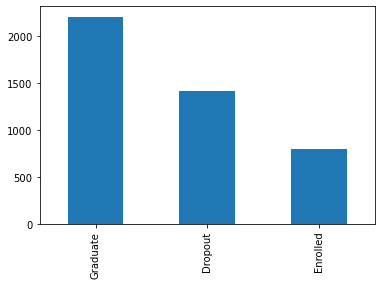

In [9]:
# Dados originais desbanlaceados
unbalanced_count = data['class'].value_counts()
unbalanced_count.plot.bar()
plt.show()

In [15]:
# Separate count and samples by the diferent classes
graduate_count, droupout_count, enrolled_count = data['class'].value_counts()

print("GRADUATE: {} | DROUPOUT: {} | ENROLLED: {}".format(graduate_count, droupout_count, enrolled_count))

graduate_samples = data[data['class'] == "Graduate"]
droupout_samples = data[data['class'] == "Dropout"]
enrolled_samples = data[data['class'] == "Enrolled"]

GRADUATE: 2209 | DROUPOUT: 1421 | ENROLLED: 794


##### Random Over-Sampling

«Oversampling can be defined as adding more copies to the minority class.»

**Disvantagens:** pod causar *overfitting* e pobre generalização do conjunto de dados para teste.

Total dintinct classes: 
Graduate    2209
Dropout     2209
Enrolled    2209
Name: class, dtype: int64


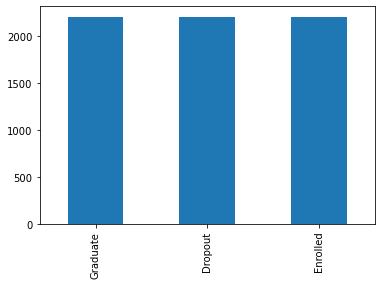

In [21]:
# number of the smallest to the larger ones
droupout_samples_over = droupout_samples.sample(graduate_count, replace=True)
enrolled_samples_over = enrolled_samples.sample(graduate_count, replace=True)

test_samples_over = pd.concat([graduate_samples, droupout_samples_over, enrolled_samples_over], axis=0)

print("Total dintinct classes: \n{}".format(test_samples_over['class'].value_counts()))

rnd_oversampling_count = test_samples_over['class'].value_counts()
rnd_oversampling_count.plot.bar()
plt.show()

##### Synthetic Minority Oversampling Technique (SMOTE)

In [24]:
import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
# TODO find want is supposted to be x and y 
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))


from imblearn.over_sampling import SMOTE

smote = SMOTE()
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

NameError: name 'x' is not defined

É importante referir que nenhuma das soluções acima é uma solução perfeita, pois a aplicação de undersampling pode inplicar a perda de infromação, da mesma forma que a aplicação de oversampling (sem qualquer modificação das amostras escolhidas aleatóriamente para serem replicadas) pode levar a um posterior overfitting dos modelos gerados a estes novos dados.


##### Combine under and over sampling

Tendo isto em conta a seguinte tentativa tenta encontrar um meio termos entre as soluções anteriores, fazendo as classes em questão convergir para um valor mediano e não para um máximo nem minímo, tentando combater as consequencias sentidas nos dados ao aplicar isoladamente cada uma das estratégias, obtando por alcaçar um meio termo.

Total dintinct classes: 
Graduate    1421
Dropout     1421
Enrolled    1421
Name: class, dtype: int64


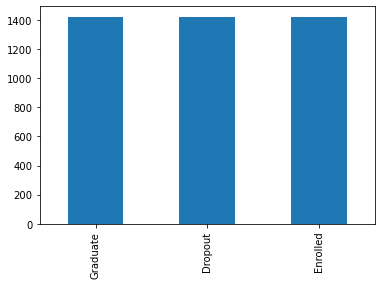

In [20]:
# make the counts meet at the middle point
# in this case the middle point is consider to be the dropout class
graduate_samples_middle = graduate_samples.sample(droupout_count, replace=True)
enrolled_samples_middle = enrolled_samples.sample(droupout_count, replace=True)

test_samples_middle = pd.concat([graduate_samples_middle, droupout_samples, enrolled_samples_middle], axis=0)

print("Total dintinct classes: \n{}".format(test_samples_middle['class'].value_counts()))

middle_sampling_count = test_samples_middle['class'].value_counts()
middle_sampling_count.plot.bar()
plt.show()